# Machine learning for physicists


## 1- Structure of a neural network 

Brain is somthing which takes on input and generates output. How does it work? It is emazing that it works by electricity by electrical signals. 

It inspired a lot of mathematicians and computer scientists to invent something that it in now called artificial neural networks (ANNs). ANN works as an algorithem on a real computer that it takes an input, calculates a complex complicated nonlinear function of this input and generates an output.

This ANN has a lot of applications such as image recognation, speach recognation, language translation and so on.
In science and physics, NNs have been used and are now being used for example you can predict properties of materials (e.g. melting point of materials) by training NN for very large databases of many different materials that many people have and measured melting point of these materials, and then ask it about melting point of material to predict that you have never even fabricated. 

Historically ANNs are as old as computers. They started in 1950s when people were thinking about making computers that are as smart as humans. In 1956 the first neural networks were invented. These very simple NNs didnot have many neurons and just had few layers. One important milestone to invent an efficient algorithm for training these NNs called back propagation and it was first invented in the 1970s and came to the attention of computer scientists in the 1980s. In the 1980s and 1990s more sophisticated NN types were invented i.e. recurrent neural networks that have memory, convolutional networks that are really good for images. However in these times computers were not yet very powerful as compare to the laptop that we have today. It was strugliing with invented algorithm with low computational performance computers. In early 2000s, powerful techniques were invented to train NNs that are large with many neurons and many layers so-called deep neural networks which we now know can become really powerful. There is nice onlne book by Nielson https://michaelnielsen.org/ is called neural networks and deep learning http://neuralnetworksanddeeplearning.com/. It gives more details.   


How does a nueral network really work? If we view a neural network as a black box, it is nothing but a function that takes input and turns it into an output. This function can be complicated. It has not only the possibility of many input variables and many output variables. But it is also parameterized. Because we want to train this function and training means we have to be able to change this function. So this function has many parameters and during training these parameters will change. The building blocks of NN are the neurons and the connections between them. When we draw the structure of a NN, we distinguish different layers, input layer where we feed in the input values, there are several layers called hidden layers and then there is an output layer.  

<div>
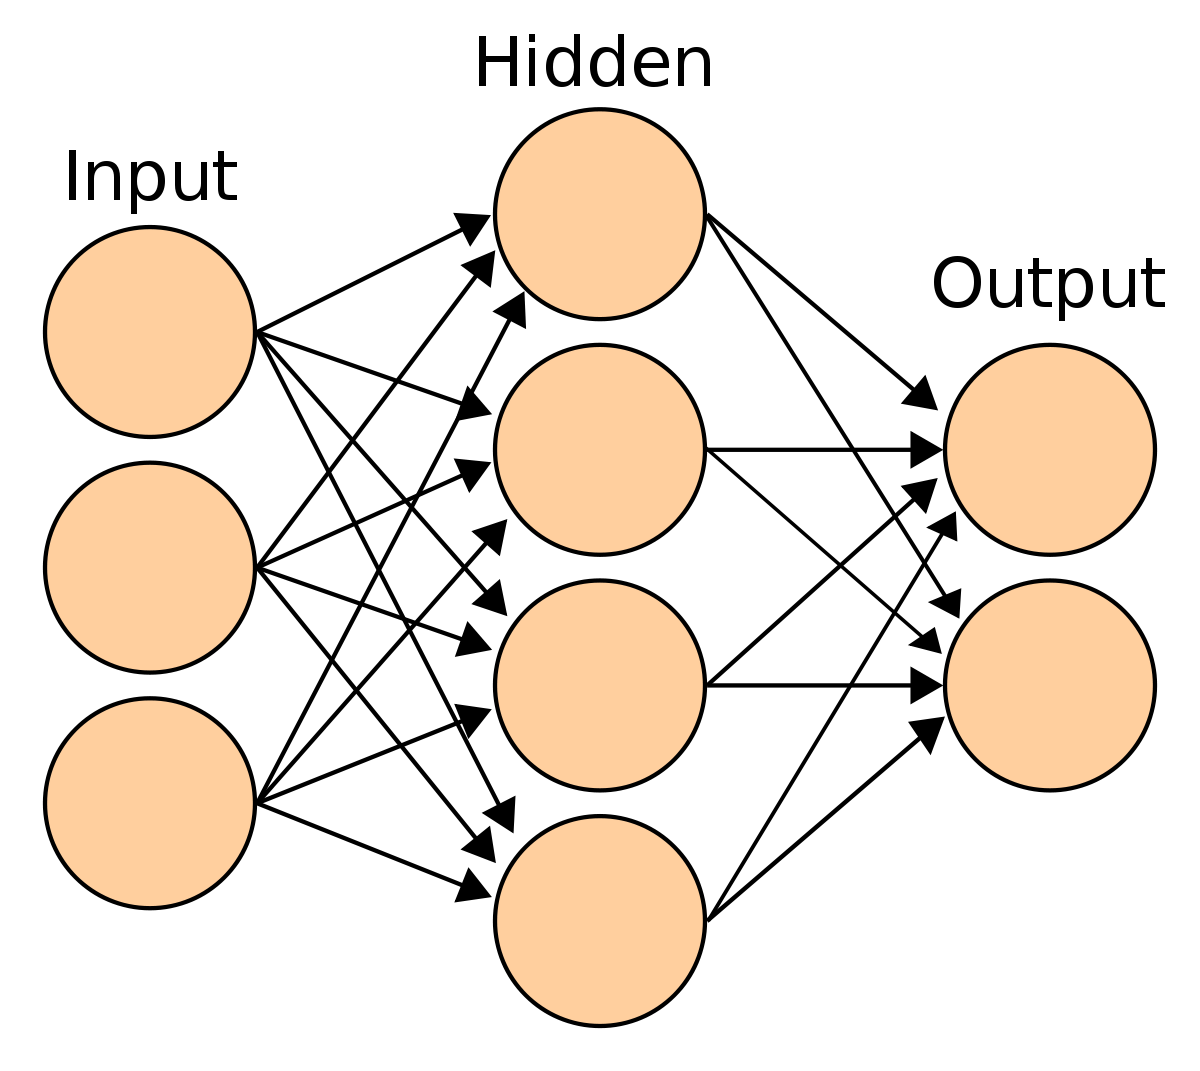
</div>
    ]
Each neuron carries a number, we can label them y_1, y_2 , and so on. We have just an array of numbers. Output neuron is conected to the input neurons by the lines and each line has a certain strength that we will call it a weight. These weights are w1, w2, and so on. These will change during training. We take weighted sum of the input values. It means multiplying each y_j input value with the corresponding w_j and then sum them all up. If one of the weights might be zero, the value of the corresponding y will not contribute. We add to this weighted sum some offset. It gives us a results, we call it z.  

$ z = \sum_j w_jy_j  + b $

This is not yet the value that the output neuron will carry. We feed it into a nonlinear function f and after appling this nonlinear function f to the value of z, we can assign it to neuron. In this procedure we first take the linear operation ( linear function has parameters that can change) and then apply a nonlinear operation (nonlinear function that is just kept fixed). This nonlinear function is independent on any parametres and can be chosen fixed. There are very simple nonlinear functions called sigmoid (it is like a step function, physicist might identify it as a Fermi-Dirac distribution) and RELU (rectified linear unit). The whole neural network consist of many of these elementary biulding blocks.     
For example if we have input neurons with values of 0.1, 1.3 and look at one of the neurons in the upper layer and we want to calculate its value. First we have to ask what are the weights and lets they are 0.5 and 0.1 and offset value of 0.3 so :

z = 0.1 * 0.5 + 1.3 * 0.1 + 0.3

Then we plug the value of z into nonlinear function f(z) = 0.7 


<div>
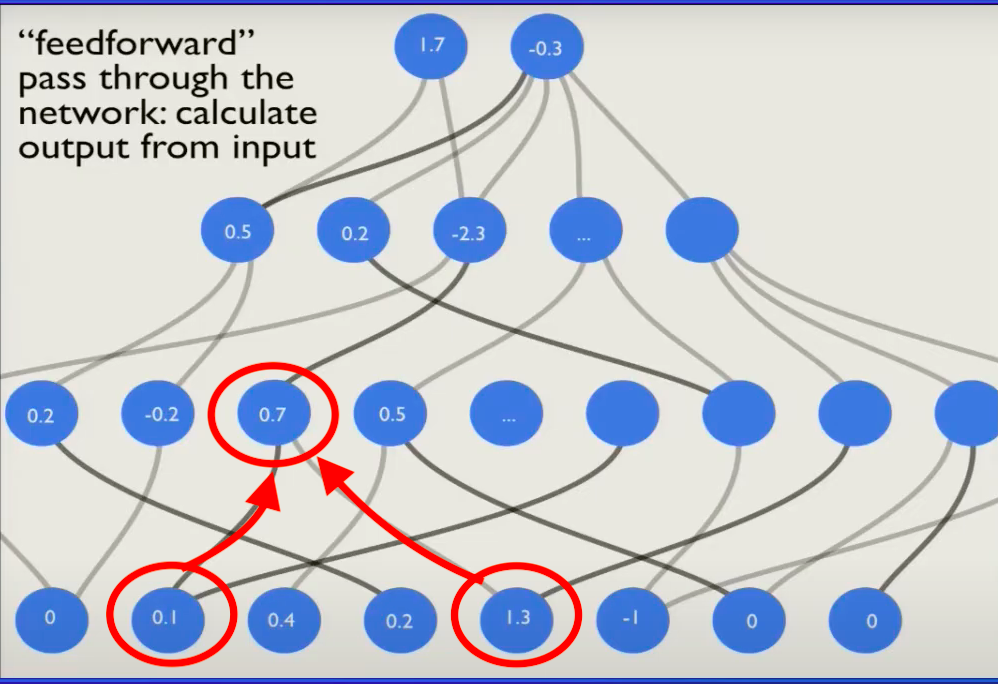
</div>


The evaluation of the neural networks that we do layer by layer is called feedforward 

Here it is very useful to use more efficinet notation than to give a name for each varaibel for example w1, w2,....
So our goal is to write these expression in terms of linear algebra, that means in terms of matrix, vector product.
We have to introduce indices to all our nuerons and all weights. We also have to give another index for layer to distinguish the different layers of our networks. 

In the simple NN we neglect for this moment these extra indices. We have one input layer and one output layer. We use index j for output neurons and index k for all our input neurons. Thereafter we build the weighted sum (superposition) for each input neuron $y_k^{in}$ and each output neuron $z_j$ and a weight for the conection of the input neuron k to the output neuron j, $w_{jk}$: $z_j = \sum_k wjk y_j^{in} + b_j$.

In the matrix/vector notation we have : $z = wy^{in} + b$ and the result z will be again a vector. The value of output neuron $y_j^{out}$ is just elementwise nonlinear function f applied to the $z_j$, $y_j^{out} = f(z_j)$.   


## Neural network with pure python


This part of codes shows that how we can implement the forward-pass (evaluation) of a deep, fully connected neural network in a few lines of python. Finally this illustrates the results for randomly initialized neural networks.

#### Imports: only numpy and matplotlib

In [1]:
from numpy import * # we need the numpy for linear algebra

#### A very simple neural network (no hidden layer)

In [2]:
N0 = 3 # input layer size
N1 = 2 # output layer size

w = random.uniform(low=-1,high=+1,size=(N1,N0)) # random weights : N1xN0
b = random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector 

In [3]:
y_in = array([0.2,0.4,-0.1])  # input values

In [4]:
# Apply network
z = dot(w,y_in) + b # result : the vector of z values, length N1
y_out = 1/(1+exp(-z)) # the sigmoid function applied elementwise

In [5]:
print("y_in", y_in)
print("w",w)
print("b",b)
print("z",z)
print("y_out", y_out)

y_in [ 0.2  0.4 -0.1]
w [[-0.10367932 -0.42575505 -0.09734209]
 [-0.60506882 -0.52874862  0.49769139]]
b [-0.72413797 -0.57851183]
z [-0.90544164 -0.96079418]
y_out [0.28793352 0.27671921]


#### Visualize network result

We have just two input values and one output value. First we define a madule that takes input values, weight matrix and offset vector and return output value. 

In [9]:
def apply_net(y_in): 
    global w,b
    
    z = dot(w,y_in) + b
    return 1/(1+exp(-z))

In [7]:
                                        #  O output      
N0 = 2 # input layer size              #  / \
N1 = 1 # output layer size            #  O  O input

w = random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights : N1xN0
b = random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector 

In [11]:
apply_net([0.8,0.3]) 

array([0.99973212])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
M = 50
y_out = zeros((M,M))

for j1 in range(M):
    for j2 in range(M):
        value0 = float(j1)/M-0.5
        value1 = float(j2)/M-0.5
        y_out[j1,j2] = apply_net([value0,value1])[0]

In [20]:
y_out[j1,j2]

0.997355014603592

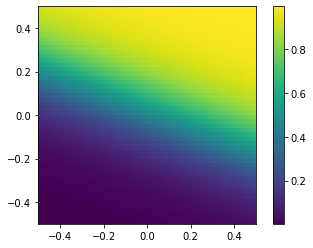

In [16]:
plt.imshow(y_out,origin="lower", extent = (-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

#### Visualize a multi-layer network (2 input, 1 hiden, 1 output)

In [26]:
def apply_layer(y_in,w,b): 
    
    
    z = dot(w,y_in) + b
    return 1/(1+exp(-z))

In [27]:
N0 = 2 # input layer size              
N1 = 30 # hiden layer size            
N2 = 1  # output layer size

# weights and biases
#from input layer to hiden layer
w1 = random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights : N1xN0
b1 = random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector 

#from hiden layer to output layer 
w2 = random.uniform(low=-10,high=+10,size=(N2,N1)) # random weights : N1xN0
b2 = random.uniform(low=-1,high=+1,size=N2) # biases: N1 vector 

In [28]:
# evaluate the network by subsequently
# evaluating the two steps (input to hidden and
# hidden to output)
def apply_net(y_in): 
    global w1,b1,w2,b2
    
    y1 = apply_layer(y_in,w1,b1)
    y2 = apply_layer(y1,w2,b2)
    return y2

In [29]:
#obtain values for a range of inputs
M = 50
y_out = zeros((M,M))

for j1 in range(M):
    for j2 in range(M):
        value0 = float(j1)/M-0.5
        value1 = float(j2)/M-0.5
        y_out[j1,j2] = apply_net([value0,value1])[0]

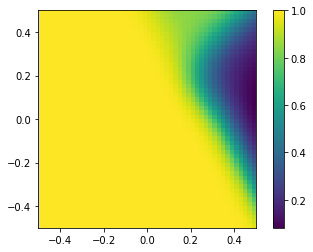

In [30]:
plt.imshow(y_out,origin="lower", extent = (-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

#### A network with many layers

In [31]:
Nlayers=20 # not counting the input layer & the output layer
LayerSize=100

Weights=random.uniform(low=-3,high=3,size=[Nlayers,LayerSize,LayerSize])
Biases=random.uniform(low=-1,high=1,size=[Nlayers,LayerSize])

# for the first hidden layer (coming in from the input layer)
WeightsFirst=random.uniform(low=-1,high=1,size=[2,LayerSize])
BiasesFirst=random.uniform(low=-1,high=1,size=LayerSize)

# for the final layer (i.e. the output neuron)
WeightsFinal=random.uniform(low=-1,high=1,size=[LayerSize,1])
BiasesFinal=random.uniform(low=-1,high=1,size=1)

In [32]:
def apply_layer_new(y_in,w,b): # a function that applies a layer    
    z=dot(y_in,w)+b # note different order in matrix product!
    return(1/(1+exp(-z)))

In [33]:
def apply_multi_net(y_in):
    global Weights, Biases, WeightsFinal, BiasesFinal, Nlayers
    
    y=apply_layer_new(y_in,WeightsFirst,BiasesFirst)    
    for j in range(Nlayers):
        y=apply_layer_new(y,Weights[j,:,:],Biases[j,:])
    output=apply_layer_new(y,WeightsFinal,BiasesFinal)
    return(output)

In [34]:
# Generate a 'mesh grid', i.e. x,y values in an image
M=40
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() # fill second component

In [35]:
# use the MxM input grid that we generated above 
y_out=apply_multi_net(y_in) # apply net to all these samples!

In [36]:
y_2D=reshape(y_out[:,0],[M,M]) # back to 2D image

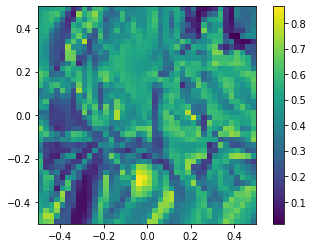

In [37]:
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.colorbar()
plt.show()

Now do the same, but high-resolution (400x400 picture)

In [38]:
# Generate a 'mesh grid', i.e. x,y values in an image
M=400
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() # fill second component

In [39]:
# use the MxM input grid that we generated above 
y_out=apply_multi_net(y_in) # apply net to all these samples!

In [40]:
y_2D=reshape(y_out[:,0],[M,M]) # back to 2D image

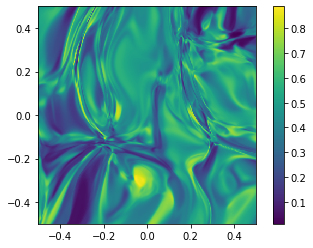

In [41]:
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.colorbar()
plt.show()

This picture shows that NN can create very complicated fuctions. It is created by random function. But we want to create functions that we prescribe by the training data and we want to prescribe what shuld be a correct values.

## Processing batches

We are  interested in calculating not only the output of the network for a single input but for hundreds of inputs in parallel. When we want to get the output of the network for 100 samples in parallel, we call it a batch of samples.
In the other word we want to feed many samples in parallel into the network without doing a loop.  
In one sample we have a vector in size of $N_{in}$ the number of nuerons of the network, however in many samples we extend our array with extra index that counts the sample and we have a two dimension matrix of  $(N_{sample},N_{in})$.

#### Applying a network to a 'batch' of samples

In [42]:
# See how the dot product works: 
# 'contracts' (sums over) the innermost index
W=zeros([7,8])
y=zeros([8,30]) 
# here '30' would stand for the number of samples
# in our envisaged network applications
shape(dot(W,y))

(7, 30)

In [44]:
# now try to add the bias vector entries,
# in the most naive way (beware!)
B=zeros(7)
result=dot(W,y)+B # will produce an error!

ValueError: shapes (8,7) and (30,8) not aligned: 7 (dim 1) != 30 (dim 0)

In [45]:
# But with a re-ordering of indices, this works!
# So, let's take the dimension of size 30 to be
# the very first one:
y=zeros([30,8])
W=zeros([8,7])
shape(dot(y,W))

(30, 7)

In [46]:
# and now try again adding the bias vector,
# again in a naive way
B=zeros(7)
result=dot(y,W)+B 
# will give the desired result, 
# because B is 'broadcast' to shape (30,7)
shape(result)

(30, 7)

Set up for batch processing, i.e. parallel evaluation of many input samples!

In [47]:
def apply_layer_new(y_in,w,b): # a function that applies a layer    
    z=dot(y_in,w)+b # note different order in matrix product!
    return(1/(1+exp(-z)))

In [48]:
def apply_net_new(y_in): # same as before, but with new layer function
    global w1,b1,w2,b2
    
    y1=apply_layer_new(y_in,w1,b1)
    y2=apply_layer_new(y1,w2,b2)
    return(y2)


In [49]:
N0=2 # input layer size
N1=5 # hidden layer size
N2=1 # output layer size

# from input layer to hidden layer:
w1=random.uniform(low=-10,high=+10,size=(N0,N1)) # NEW ORDER!! N0xN1
b1=random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# from hidden layer to output layer:
w2=random.uniform(low=-10,high=+10,size=(N1,N2)) # NEW ORDER N1xN2
b2=random.uniform(low=-1,high=+1,size=N2) # biases

In [50]:
batchsize=10000
y=random.uniform(low=-1,high=1,size=(batchsize,2))

In [51]:
y_out=apply_net_new(y)

In [52]:
shape(y_out) 
# these were 10000 samples evaluated in parallel!!!

(10000, 1)

#### Now visualize multi-layer net again, but more efficiently!
All the pixels in the image are samples, process all of them together!



In [53]:
M=50
# Generate a 'mesh grid', i.e. x,y values in an image
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))

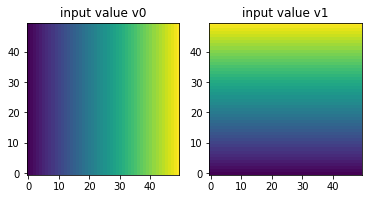

In [54]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(v0,origin='lower')
ax[0].set_title("input value v0")
ax[1].imshow(v1,origin='lower')
ax[1].set_title("input value v1")
plt.show()

## Summary

In this section we learnt about the emergence and development of deep learning, the 2-steps process changed to the sequences of modules, linear step and nonlinear step. Each module has tunable parameters and nonlinearity. Then, stack them making multiple layers. This is why it is called “deep learning”. The reason why using nonlinearity rather than linearity is that two linear layers could be one linear layer since the composition of two linear is linear.</p>

The simplest multi-layer architecture with changable parameters and nonlinearity could be: the input is represented as a vector such as an image or audio. This input is multiplied by the weight matrix whose coefficient is a tunable parameter. Then, every component of the result vector is passed through a nonlinear function such as ReLU and sigmoid. Repeating this process, it becomes a basic neural network. The reason why it is called a neural network is that this architecture calculates the weighted sum of components of input by corresponding rows of a matrix.

The lecture from Prof.Dr. Florian Marquardt and ref : https://github.com/FlorianMarquardt/machine-learning-for-physicists/blob/master/01_MachineLearning_Basics_NeuralNetworksPython.ipynb
